In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt


C:\Users\moses\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\moses\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\moses\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [41]:
data = pd.read_csv("C:\\Users\moses\Downloads\spam.csv",encoding='latin-1')
print(data.shape)
data.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [44]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.head(10)

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [45]:
cols = {'v1':'Label','v2':'Text'}
data = data.rename(columns=cols)
data

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [46]:
# Getting all words in all 5572 SMS's
texts = list(data.Text.values)
words = []
for i in texts:
    words.extend(i.split(" "))
len(words)

86961

In [14]:
from collections import Counter

In [15]:
for i in range(len(words)):
    if not words[i].isalpha():
        words[i] = ""

# Create a Counter dictionary to maintain ('word':count) tuples.
word_dict = Counter(words)
word_dict.most_common(1)     # Get the 1st most common word.

[('', 19860)]

In [47]:
del word_dict['']
# Check
word_dict.most_common(1)

[('to', 2134)]

In [48]:
# Getting the 3000 most common words in text messages (Why 3000 ? Hit and trial)
w_new = word_dict.most_common(3000)
w_new

[('to', 2134),
 ('you', 1622),
 ('I', 1466),
 ('a', 1327),
 ('the', 1197),
 ('and', 857),
 ('in', 798),
 ('is', 781),
 ('i', 742),
 ('u', 692),
 ('for', 644),
 ('my', 628),
 ('of', 591),
 ('your', 560),
 ('me', 557),
 ('on', 487),
 ('have', 474),
 ('that', 421),
 ('it', 396),
 ('are', 396),
 ('call', 376),
 ('or', 373),
 ('be', 362),
 ('at', 359),
 ('with', 349),
 ('not', 340),
 ('will', 330),
 ('get', 326),
 ('can', 304),
 ('U', 299),
 ('so', 294),
 ('ur', 293),
 ('but', 282),
 ('You', 263),
 ('from', 256),
 ('do', 243),
 ('up', 241),
 ('just', 236),
 ('if', 235),
 ('go', 234),
 ('when', 233),
 ('know', 224),
 ('this', 223),
 ('like', 222),
 ('we', 221),
 ('all', 216),
 ('out', 207),
 ('got', 204),
 ('was', 200),
 ('come', 198),
 ('now', 190),
 ('am', 186),
 ('want', 157),
 ('Call', 155),
 ('by', 155),
 ('time', 154),
 ('about', 150),
 ('send', 150),
 ('only', 147),
 ('then', 146),
 ('going', 142),
 ('what', 142),
 ('need', 141),
 ('n', 137),
 ('How', 137),
 ('still', 134),
 ('as', 13

In [49]:
features,columns = [],[]

# Creating the columns(features)
for word in w_new:
    columns.append(word[0])

# Creating data
for s in texts:
    d = []
    for wrd in w_new:
        d.append(s.count(wrd[0]))
    features.append(d)

# Create dataframe
df = pd.DataFrame(features,columns=columns)
df

,to,you,I,a,the,and,in,is,i,u,...,cry,craziest,singing,curry,p,tomorro,Subscriber,Black,Message,Important
0,0,0,0,7,1,0,3,1,6,4,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,5,0,0,3,0,5,2,...,0,0,0,0,4,0,0,0,0,0
3,0,0,0,5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,2,0,0,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,9,2,0,1,3,9,3,...,0,0,0,0,3,0,0,0,0,0
5568,1,0,0,2,0,0,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0
5569,0,0,0,3,1,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
5570,1,0,1,3,0,1,5,0,10,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.set_option(include = 'all')



In [50]:
df['label'] = 0
df

,to,you,I,a,the,and,in,is,i,u,...,craziest,singing,curry,p,tomorro,Subscriber,Black,Message,Important,label
0,0,0,0,7,1,0,3,1,6,4,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,5,0,0,3,0,5,2,...,0,0,0,4,0,0,0,0,0,0
3,0,0,0,5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,2,0,0,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,9,2,0,1,3,9,3,...,0,0,0,3,0,0,0,0,0,0
5568,1,0,0,2,0,0,1,0,2,0,...,0,0,0,1,0,0,0,0,0,0
5569,0,0,0,3,1,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
5570,1,0,1,3,0,1,5,0,10,4,...,0,0,0,0,0,0,0,0,0,0


In [51]:
labels = {'spam':1,'ham':0}             # Spam = 1, Not spam = 0
for i in range(df.shape[0]):
    df.iloc[i,3000] = int(labels[data.iloc[i,0]])
df

,to,you,I,a,the,and,in,is,i,u,...,craziest,singing,curry,p,tomorro,Subscriber,Black,Message,Important,label
0,0,0,0,7,1,0,3,1,6,4,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,5,0,0,3,0,5,2,...,0,0,0,4,0,0,0,0,0,1
3,0,0,0,5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,2,0,0,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,9,2,0,1,3,9,3,...,0,0,0,3,0,0,0,0,0,1
5568,1,0,0,2,0,0,1,0,2,0,...,0,0,0,1,0,0,0,0,0,0
5569,0,0,0,3,1,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
5570,1,0,1,3,0,1,5,0,10,4,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = np.array(features)

In [59]:
#Normalizing our dataset to minimize overfitting
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.66380889, -0.51421547, -0.53536076, ..., -0.02680281,
        -0.04022228, -0.01894905],
       [-0.66380889, -0.51421547, -0.53536076, ..., -0.02680281,
        -0.04022228, -0.01894905],
       [ 2.57785908, -0.51421547, -0.53536076, ..., -0.02680281,
        -0.04022228, -0.01894905],
       [-0.66380889, -0.51421547, -0.53536076, ..., -0.02680281,
        -0.04022228, -0.01894905],
       [ 0.4167471 , -0.51421547,  0.32628862, ..., -0.02680281,
        -0.04022228, -0.01894905]])

In [60]:
Y = np.array(df.label)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [63]:
#Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [64]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.90337929, 0.09662071],
       [0.90834511, 0.09165489],
       [0.95473793, 0.04526207],
       ...,
       [0.88932715, 0.11067285],
       [0.93837866, 0.06162134],
       [0.8902398 , 0.1097602 ]])

In [66]:
#Testing accuracy
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = 0)

0.9530090684253916

In [67]:
#Using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 180    7]
 [  50 1156]]


Confusion matrix, without normalization
[[ 180    7]
 [  50 1156]]


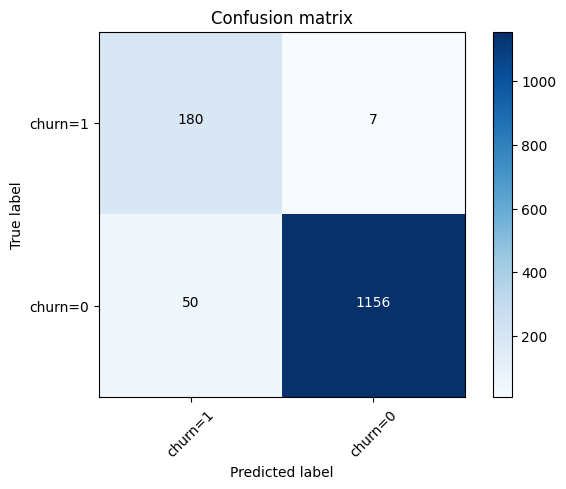

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [69]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1206
           1       0.78      0.96      0.86       187

    accuracy                           0.96      1393
   macro avg       0.89      0.96      0.92      1393
weighted avg       0.97      0.96      0.96      1393

